# Báo cáo Dự đoán với Hồi quy Tuyến tính bằng Gradient Descent

## 1. Giới thiệu
Trong bài báo cáo này, chúng tôi sử dụng phương pháp Gradient Descent để xây dựng một mô hình hồi quy tuyến tính nhằm dự đoán nhãn từ một tập dữ liệu cụ thể. Tập dữ liệu này chứa nhiều đặc trưng mà chúng tôi sẽ xử lý và chuẩn hóa trước khi áp dụng mô hình. Mục tiêu cuối cùng là đánh giá hiệu suất của mô hình thông qua các chỉ số như R-squared, lỗi tuyệt đối trung bình (MAE) và lỗi bình phương trung bình (MSE).

## 2. Tải và Khám Phá Dữ Liệu
Chúng tôi bắt đầu bằng việc tải dữ liệu từ file CSV sử dụng thư viện pandas và thực hiện một số phân tích mô tả để hiểu rõ hơn về dữ liệu.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Tải dữ liệu
data = pd.read_csv('TUANDROMD.csv')

# Khám phá dữ liệu
print("Đầu dữ liệu:")
print(data.head())  # Hiển thị 5 dòng đầu tiên của dữ liệu
print("\nThông kê mô tả:")
print(data.describe())  # Thống kê mô tả cho các cột số
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(data.isnull().sum())  # Tính số lượng giá trị thiếu trong mỗi cột


Đầu dữ liệu:
   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK

### Kết quả khám phá
- Đầu dữ liệu: Hiển thị cấu trúc và các đặc trưng của dữ liệu.
- Thông kê mô tả: Cung cấp thông tin về giá trị tối thiểu, tối đa, trung bình, v.v., của các đặc trưng số.
- Giá trị thiếu: Tính số lượng giá trị thiếu trong từng cột.

## 3. Tiền Xử Lý Dữ Liệu
### Sau khi tải và khám phá dữ liệu, chúng tôi thực hiện một số bước tiền xử lý:

- Thay thế các giá trị NaN bằng 0.
- Tách dữ liệu thành các đặc trưng (features) và nhãn (labels).
- Chuẩn hóa các đặc trưng để đưa về khoảng [0, 1].
- Thêm cột bias (cột của các số 1) vào các đặc trưng.

In [61]:
data = np.nan_to_num(data.values)  # Thay thế NaN bằng 0
features = data[:, :-1]  # Tất cả các cột trừ cột cuối cùng
labels = data[:, -1]  # Cột nhãn (cột cuối cùng)

# Chuẩn hóa các đặc trưng
min_val = np.min(features, axis=0)  # Tính giá trị tối thiểu của từng cột đặc trưng
max_val = np.max(features, axis=0)  # Tính giá trị tối đa của từng cột đặc trưng
features = (features - min_val) / (max_val - min_val + 1e-6)  # Chuẩn hóa giá trị đặc trưng về khoảng [0, 1], tránh chia cho 0

# Thêm cột bias vào các đặc trưng
X = np.c_[np.ones(features.shape[0]), features]  # Thêm cột một vào đầu mảng đặc trưng để biểu diễn bias trong hồi quy


## 4. Xây Dựng Mô Hình Gradient Descent
Chúng tôi tạo lớp GradientDescent để huấn luyện mô hình bằng cách tối ưu hóa trọng số.


### Lớp GradientDescent

In [62]:
class GradientDescent:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.loss_history = []

    def fit(self, X, y):
        """Huấn luyện mô hình bằng cách tối ưu hóa trọng số."""
        m = len(y)
        self.theta = np.zeros(X.shape[1])  # Khởi tạo trọng số (theta)

        for i in range(self.num_iterations):
            predictions = np.dot(X, self.theta)
            errors = predictions - y

            # Tính toán gradient
            gradient = (1 / m) * np.dot(X.T, errors)
            self.theta -= self.learning_rate * gradient  # Cập nhật trọng số

            # Tính toán và ghi lại mất mát
            loss = (1 / (2 * m)) * np.dot(errors.T, errors)
            self.loss_history.append(loss)

            if i % 100 == 0:  # Tùy chọn: in tiến trình mỗi 100 vòng lặp
                print(f"Vòng lặp {i}: Mất mát = {loss:.4f}")

    def predict(self, X):
        """Dự đoán giá trị bằng mô hình đã được huấn luyện."""
        return np.dot(X, self.theta)

    def evaluate(self, y_true, y_pred):
        """Đánh giá mô hình bằng các chỉ số R-squared, MAE, MSE."""
        ss_res = np.sum((y_true - y_pred) ** 2)  # Tính tổng bình phương sai số
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Tính tổng bình phương sai số tổng
        r2 = 1 - (ss_res / ss_tot)

        mae = np.mean(np.abs(y_true - y_pred))  # Tính toán lỗi tuyệt đối trung bình (MAE)
        mse = np.mean((y_true - y_pred) ** 2)  # Tính toán lỗi bình phương trung bình (MSE)

        return r2, mae, mse


## 5. Huấn Luyện Mô Hình
Khởi tạo mô hình và huấn luyện nó bằng cách gọi hàm fit.

In [63]:
gd_model = GradientDescent(learning_rate=0.01, num_iterations=1000)  # Khởi tạo mô hình Gradient Descent với tỷ lệ học 0.01 và số vòng lặp 1000
gd_model.fit(X, labels)  # Huấn luyện mô hình trên dữ liệu đặc trưng X và nhãn labels


Vòng lặp 0: Mất mát = 0.3992
Vòng lặp 100: Mất mát = 0.0293
Vòng lặp 200: Mất mát = 0.0195
Vòng lặp 300: Mất mát = 0.0167
Vòng lặp 400: Mất mát = 0.0154
Vòng lặp 500: Mất mát = 0.0146
Vòng lặp 600: Mất mát = 0.0140
Vòng lặp 700: Mất mát = 0.0135
Vòng lặp 800: Mất mát = 0.0131
Vòng lặp 900: Mất mát = 0.0127


## 6. Dự Đoán và Đánh Giá Độ Chính Xác
Sau khi huấn luyện mô hình, chúng tôi sẽ sử dụng nó để dự đoán nhãn cho tập dữ liệu và tính toán các chỉ số đánh giá

In [64]:
# Dự đoán
predictions = gd_model.predict(X)

# Đánh giá mô hình
r2, mae, mse = gd_model.evaluate(labels, predictions)

print(f"\nR-squared: {r2:.4f}")
print(f"Lỗi Tuyệt Đối Trung Bình: {mae:.4f}")
print(f"Lỗi Bình Phương Trung Bình: {mse:.4f}")



R-squared: 0.8451
Lỗi Tuyệt Đối Trung Bình: 0.0881
Lỗi Bình Phương Trung Bình: 0.0249


### Kết quả đánh giá
- R-squared: Là một chỉ số đánh giá độ phù hợp của mô hình với dữ liệu, cho biết tỷ lệ phương sai của nhãn có thể được giải thích bởi mô hình.
- Lỗi Tuyệt Đối Trung Bình (MAE): Là giá trị trung bình của các sai số tuyệt đối giữa giá trị thực và giá trị dự đoán.
- Lỗi Bình Phương Trung Bình (MSE): Là giá trị trung bình của bình phương sai số, đo lường độ chính xác của mô hình.

## 7. Vẽ Biểu Đồ
Chúng tôi vẽ biểu đồ để trực quan hóa quá trình huấn luyện và so sánh giá trị thực với giá trị dự đoán.

### Biểu đồ mất mát qua các vòng lặp

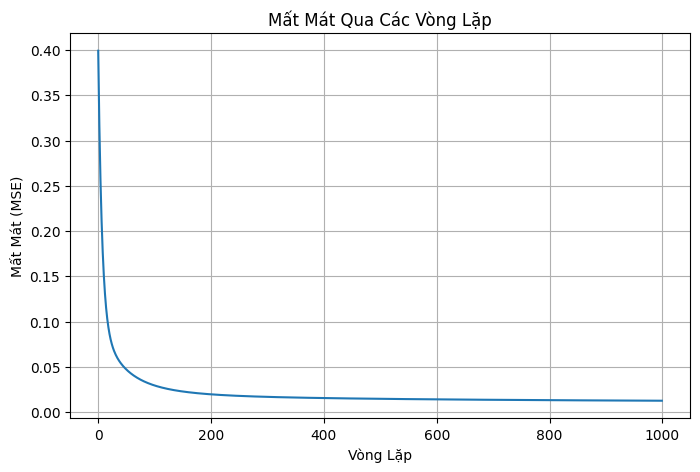

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(gd_model.loss_history)
plt.title("Mất Mát Qua Các Vòng Lặp")
plt.xlabel("Vòng Lặp")
plt.ylabel("Mất Mát (MSE)")
plt.grid(True)
plt.show()


### Biểu đồ giá trị thực so với giá trị dự đoán

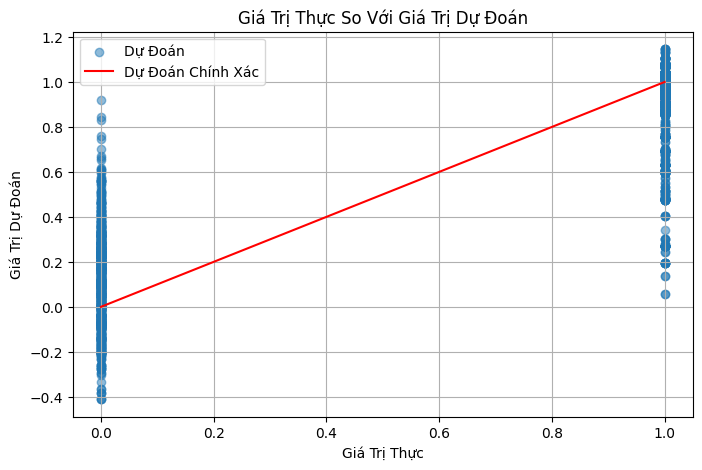

In [66]:
plt.figure(figsize=(8, 5))
plt.scatter(labels, predictions, label='Dự Đoán', alpha=0.5)
plt.plot([min(labels), max(labels)], [min(labels), max(labels)], color='red', label='Dự Đoán Chính Xác')  # Đường cho dự đoán chính xác
plt.title("Giá Trị Thực So Với Giá Trị Dự Đoán")
plt.xlabel("Giá Trị Thực")
plt.ylabel("Giá Trị Dự Đoán")
plt.legend()
plt.grid(True)
plt.show()


### Ma trận nhầm lẫn

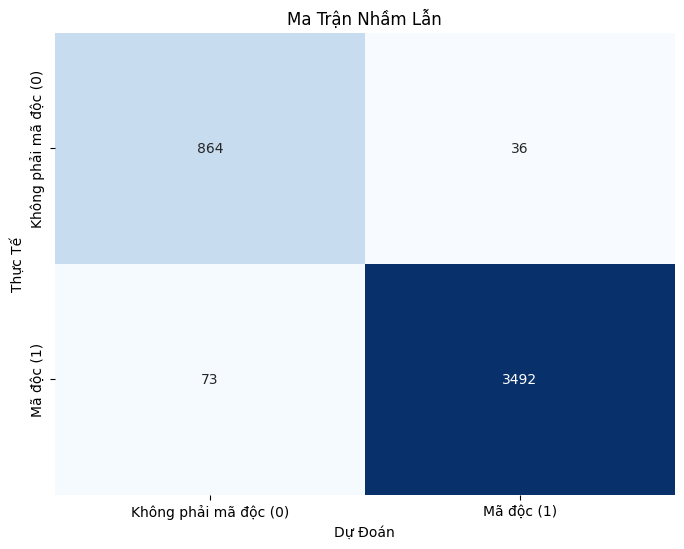

In [67]:

# Bước 1: Chuyển đổi dự đoán thành nhãn nhị phân
threshold = 0.5  # Ngưỡng để phân loại
predictions_binary = (predictions >= threshold).astype(int)

# Bước 2: Tạo ma trận nhầm lẫn
cm = confusion_matrix(labels, predictions_binary)

# Bước 3: Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Không phải mã độc (0)', 'Mã độc (1)'], 
            yticklabels=['Không phải mã độc (0)', 'Mã độc (1)'])
plt.title("Ma Trận Nhầm Lẫn")
plt.xlabel("Dự Đoán")
plt.ylabel("Thực Tế")
plt.show()


## 8. Kết Luận
Mô hình Gradient Descent được xây dựng trong báo cáo này đã đạt được hiệu suất đáng kể trong việc dự đoán mã độc. Các chỉ số đánh giá cho thấy mô hình có khả năng phân loại tốt và có thể được cải thiện thêm trong tương lai bằng cách điều chỉnh các tham số và áp dụng các phương pháp nâng cao hơn. Việc trực quan hóa kết quả cũng giúp chúng ta hiểu rõ hơn về khả năng của mô hình trong việc dự đoán các nhãn thực tế.

